In [8]:
import numpy as np
%pylab inline --no-import-all
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Conv2D, Flatten, MaxPooling2D, GaussianNoise
from keras.callbacks import History
from PIL import Image
from keras.metrics import TopKCategoricalAccuracy, SparseTopKCategoricalAccuracy
import np_utils
import cv2
import os
from PIL import Image
import cv2
import itertools
from numpy import asarray

Populating the interactive namespace from numpy and matplotlib


In [241]:
with np.load('training-dataset.npz')  as data:
    img = data['x']
    lbl = data['y']

In [ ]:
arr = lbl

new_arr = []

for i in np.nditer(arr):
    print("{:02d}".format(1))

print(new_arr)

In [635]:
# Dropping 1 position for prediction label

print(max(lbl))

26


In [34]:
print(img.shape)

(124800, 784)


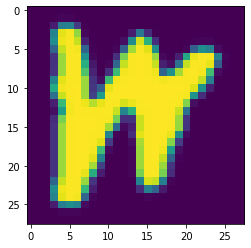

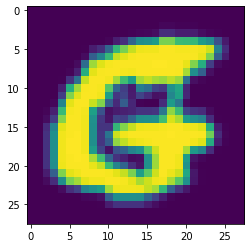

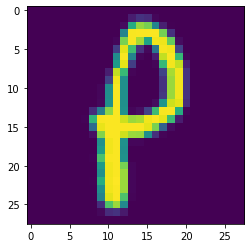

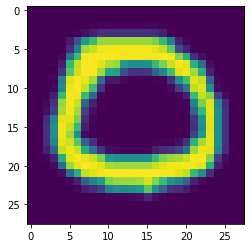

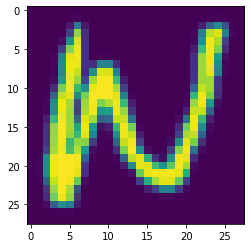

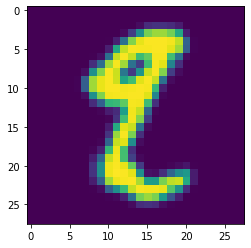

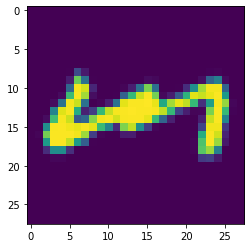

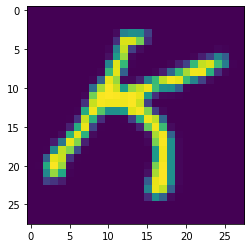

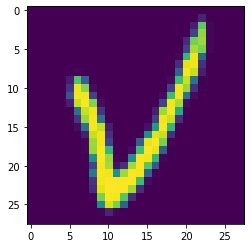

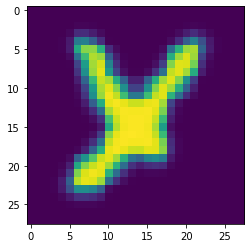

In [244]:
for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

In [235]:
# Splitting data into train and test with 80% for training data and 10% for test data

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl, test_size=0.2,random_state=1) 

# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1) 


In [236]:
# Visualising the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(99840, 784)
(7488, 784)
(17472, 784)
(7488,)
(17472,)


In [ ]:
print(X_train.shape)

In [237]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

In [238]:
# One hot decoding 
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)

In [640]:
print(max(y_test))

26.0


In [ ]:
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = 450, epochs=100, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

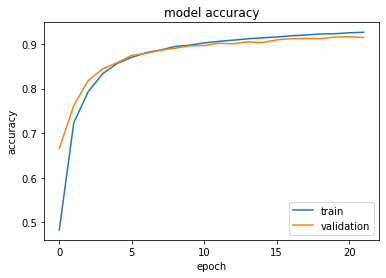

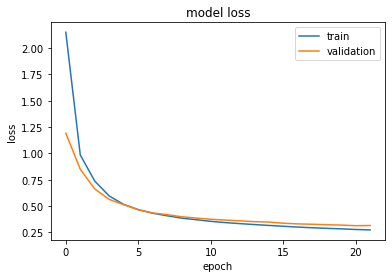

In [42]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [43]:
# Save the model to disk.
#model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred))

7488/7488 [==============================] - 3s 411us/step
0.005876068376068376


In [642]:
print(min(y_test))

1.0


In [44]:
# Evaluating the model
model.evaluate(X_test,Y_test)

7488/7488 [==============================] - 1s 147us/step


[0.31104570767308914, 0.9126602411270142]

In [45]:
(X_test.shape)

(7488, 28, 28, 1)

In [46]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               280350    
_________________________________________________________________
dense_2 (Dense)              (None, 26)               

In [47]:
print((y_pred[:10]))

[15 15  5 12 11  5  7 20 17  0]


In [48]:
print((y_test[:10]).astype('int32'))

[16 16  6 13 12  6  8 21 18  1]


In [49]:
# Task 2 
# Appeding leading zero to label
# Making the model Robust against noises in the image

In [248]:
# Splitting data into train and test with 80% for training data and 10% for test data

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl_task_2, test_size=0.2,random_state=1) 

# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1) 


In [249]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

In [250]:
# One hot decoding 
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)

In [251]:
# compiling and fitting the sequential model
#.....................................
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['top_k_categorical_accuracy'])
history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

Train on 99840 samples, validate on 17472 samples
Epoch 1/100
99840/99840 [==============================] - 65s 656us/step - loss: 2.7675 - top_k_categorical_accuracy: 0.5127 - val_loss: 1.3427 - val_top_k_categorical_accuracy: 0.9254
Epoch 2/100
99840/99840 [==============================] - 61s 611us/step - loss: 1.0959 - top_k_categorical_accuracy: 0.9493 - val_loss: 0.8452 - val_top_k_categorical_accuracy: 0.9687
Epoch 3/100
99840/99840 [==============================] - 59s 594us/step - loss: 0.7757 - top_k_categorical_accuracy: 0.9760 - val_loss: 0.6734 - val_top_k_categorical_accuracy: 0.9805
Epoch 4/100
99840/99840 [==============================] - 65s 646us/step - loss: 0.6429 - top_k_categorical_accuracy: 0.9840 - val_loss: 0.5815 - val_top_k_categorical_accuracy: 0.9864
Epoch 5/100
99840/99840 [==============================] - 68s 676us/step - loss: 0.5680 - top_k_categorical_accuracy: 0.9881 - val_loss: 0.5313 - val_top_k_categorical_accuracy: 0.9890
Epoch 6/100
99840/99

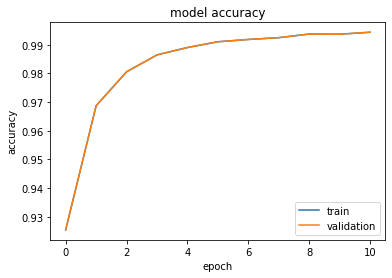

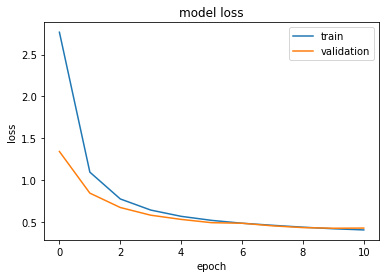

In [252]:
#summarize history for accuracy
plt.plot(history1.history['val_top_k_categorical_accuracy'])
plt.plot(history1.history['val_top_k_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [253]:
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))
print(y_test.shape)

7488/7488 [==============================] - 2s 280us/step
0.004807692307692308
(7488,)


In [254]:
top_values_index = sorted(range(len(y_pred1)), key=lambda i: y_pred1[i])[-5:]
print(top_values_index)

[7330, 7360, 7368, 7405, 7443]


In [288]:
img_data = np.load('test-dataset.npy')

In [ ]:
#make new folder
import os
cwd = os.getcwd()
print(cwd)
new_folder = "test_dataset_images"
folder = os.path.join(cwd, new_folder)
os.makedirs(folder)

In [284]:
print(folder)

C:\Users\Goutham Indiran\Machine Learning\Challenge\test_dataset_images


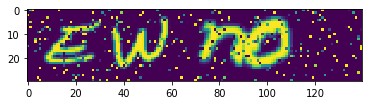

In [751]:
#converting array to images and saving it in current work directory
for i in range(25):
    data = Image.fromarray(img_data[i])
    if data.mode != 'RGB':
        data = data.convert('RGB')
    data.save(str(folder)+'\\test_image_'+str(i)+'.png') 


In [257]:
def split_image(get_value):
    pass

In [549]:
def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_list)):
            args = [iter(coord_list)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
    return sorted(new_coord)
split_image(coord_list)

[(7, 18, 11, 16),
 (11, 19, 4, 21),
 (12, 42, 3, 22),
 (15, 14, 3, 22),
 (34, 15, 6, 17),
 (37, 16, 3, 23),
 (42, 30, 3, 22),
 (54, 14, 5, 19),
 (61, 21, 4, 21),
 (64, 12, 4, 22),
 (78, 19, 3, 22),
 (80, 22, 6, 17),
 (95, 20, 3, 22),
 (101, 21, 8, 13)]

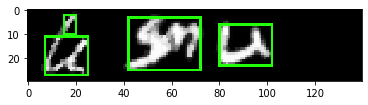

1/1 [==============================] - 0s 23ms/step
0 3
2/2 [==============================] - 0s 7ms/step
1 3
3/3 [==============================] - 0s 991us/step
1 3
4/4 [==============================] - 0s 748us/step
2 3


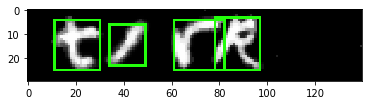

1/1 [==============================] - 0s 13ms/step
0 4
2/2 [==============================] - 0s 1ms/step
1 4
3/3 [==============================] - 0s 996us/step
2 4
4/4 [==============================] - 0s 10ms/step
3 4


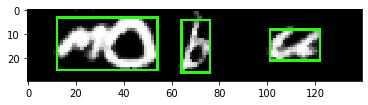

1/1 [==============================] - 0s 22ms/step
0 3
2/2 [==============================] - 0s 2ms/step
0 3
3/3 [==============================] - 0s 671us/step
1 3
4/4 [==============================] - 0s 11ms/step
2 3


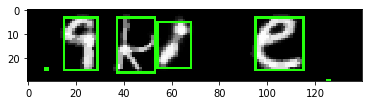

1/1 [==============================] - 0s 26ms/step
0 4
2/2 [==============================] - 0s 11ms/step
1 4
3/3 [==============================] - 0s 2ms/step
2 4
4/4 [==============================] - 0s 746us/step
3 4


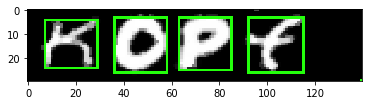

1/1 [==============================] - 0s 8ms/step
0 4
2/2 [==============================] - 0s 6ms/step
1 4
3/3 [==============================] - 0s 2ms/step
2 4
4/4 [==============================] - 0s 1ms/step
3 4


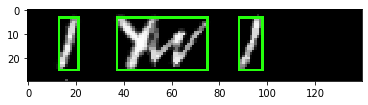

1/1 [==============================] - 0s 23ms/step
0 3
2/2 [==============================] - 0s 997us/step
1 3
3/3 [==============================] - 0s 998us/step
1 3
4/4 [==============================] - 0s 748us/step
2 3


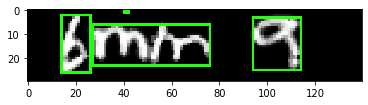

1/1 [==============================] - 0s 8ms/step
0 3
2/2 [==============================] - 0s 997us/step
1 3
3/3 [==============================] - 0s 666us/step
1 3
4/4 [==============================] - 0s 2ms/step
2 3


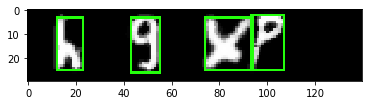

1/1 [==============================] - 0s 20ms/step
0 4
2/2 [==============================] - 0s 998us/step
1 4
3/3 [==============================] - 0s 1ms/step
2 4
4/4 [==============================] - 0s 738us/step
3 4


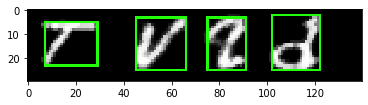

1/1 [==============================] - 0s 2ms/step
0 4
2/2 [==============================] - 0s 997us/step
1 4
3/3 [==============================] - 0s 997us/step
2 4
4/4 [==============================] - 0s 998us/step
3 4


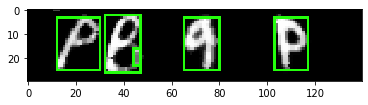

1/1 [==============================] - 0s 14ms/step
0 4
2/2 [==============================] - 0s 5ms/step
1 4
3/3 [==============================] - 0s 998us/step
2 4
4/4 [==============================] - 0s 997us/step
3 4


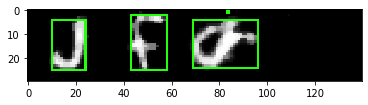

1/1 [==============================] - 0s 8ms/step
0 3
2/2 [==============================] - 0s 1ms/step
1 3
3/3 [==============================] - 0s 995us/step
2 3


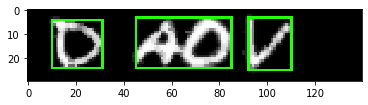

1/1 [==============================] - 0s 5ms/step
0 3
2/2 [==============================] - 0s 1ms/step
1 3
3/3 [==============================] - 0s 2ms/step
1 3
4/4 [==============================] - 0s 748us/step
2 3


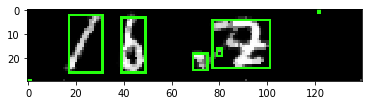

1/1 [==============================] - 0s 26ms/step
0 3
2/2 [==============================] - 0s 3ms/step
1 3
3/3 [==============================] - 0s 4ms/step
2 3


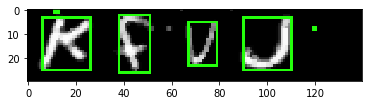

1/1 [==============================] - 0s 5ms/step
0 4
2/2 [==============================] - 0s 2ms/step
1 4
3/3 [==============================] - 0s 667us/step
2 4
4/4 [==============================] - 0s 2ms/step
3 4


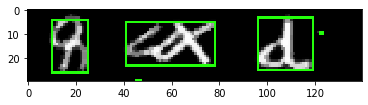

1/1 [==============================] - 0s 11ms/step
0 3
2/2 [==============================] - 0s 9ms/step
1 3
3/3 [==============================] - 0s 2ms/step
1 3
4/4 [==============================] - 0s 2ms/step
2 3


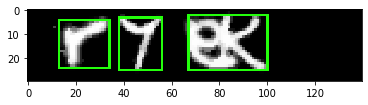

1/1 [==============================] - 0s 33ms/step
0 3
2/2 [==============================] - 0s 1ms/step
1 3
3/3 [==============================] - 0s 665us/step
2 3
4/4 [==============================] - 0s 498us/step
2 3


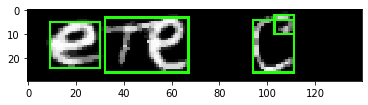

1/1 [==============================] - 0s 2ms/step
0 3
2/2 [==============================] - 0s 13ms/step
1 3
3/3 [==============================] - 0s 997us/step
1 3
4/4 [==============================] - 0s 748us/step
2 3


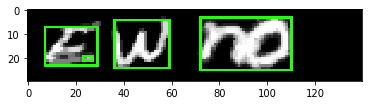

1/1 [==============================] - 0s 16ms/step
0 3
2/2 [==============================] - 0s 3ms/step
1 3
3/3 [==============================] - 0s 2ms/step
2 3
4/4 [==============================] - 0s 2ms/step
2 3


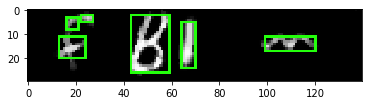

1/1 [==============================] - 0s 3ms/step
0 4
2/2 [==============================] - 0s 1ms/step
1 4
3/3 [==============================] - 0s 2ms/step
2 4
4/4 [==============================] - 0s 999us/step
3 4


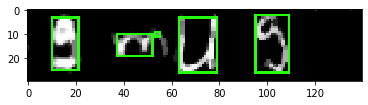

1/1 [==============================] - 0s 20ms/step
0 4
2/2 [==============================] - 0s 1ms/step
1 4
3/3 [==============================] - 0s 2ms/step
2 4
4/4 [==============================] - 0s 6ms/step
3 4


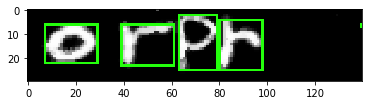

1/1 [==============================] - 0s 2ms/step
0 4
2/2 [==============================] - 0s 5ms/step
1 4
3/3 [==============================] - 0s 665us/step
2 4
4/4 [==============================] - 0s 748us/step
3 4


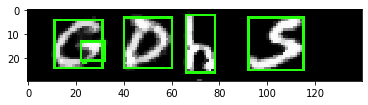

1/1 [==============================] - 0s 11ms/step
0 5
2/2 [==============================] - 0s 7ms/step
1 5
3/3 [==============================] - 0s 666us/step
2 5
4/4 [==============================] - 0s 5ms/step
3 5
5/5 [==============================] - 0s 798us/step
4 5


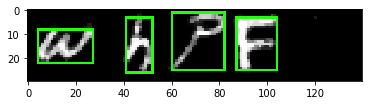

1/1 [==============================] - 0s 5ms/step
0 4
2/2 [==============================] - 0s 997us/step
1 4
3/3 [==============================] - 0s 997us/step
2 4
4/4 [==============================] - 0s 3ms/step
3 4


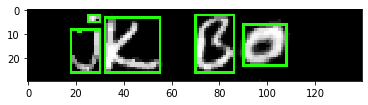

1/1 [==============================] - 0s 8ms/step
0 4
2/2 [==============================] - 0s 1ms/step
1 4
3/3 [==============================] - 0s 995us/step
2 4
4/4 [==============================] - 0s 6ms/step
3 4


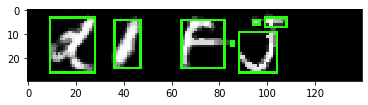

1/1 [==============================] - 0s 18ms/step
0 4
2/2 [==============================] - 0s 2ms/step
1 4
3/3 [==============================] - 0s 1ms/step
2 4
4/4 [==============================] - 0s 2ms/step
3 4
Final Prediction List: [['23041604,25190122,24250202,11171421,21071323'], ['20020501,26161117,18060611,11070202,17171818'], ['23151717,02022602,14042011,01070723,13170221'], ['02180507,01070217,16080703,17021702,07110605'], ['25160705,02151816,08021717,13040220,11171606'], ['16250826,06132217,02112307,17021116,07242106'], ['03172413,17022302,02181716,05140717,07131307'], ['07161818,18010207,02022317,08172406,11071116'], ['18250717,10111707,16212410,06230201,20222604'], ['07261604,18180218,17060102,06071706,16020716'], ['120701,252002,070526,041007,100617'], ['15040326,03080425,17170221,02071722,04011523'], ['170107,202626,071701,160717,060202'], ['14170421,02181012,13052307,18072104,11062210'], ['25081407,02010224,17191808,26172401,24071104'], ['172601,202418,181007,06

In [755]:
folder="test_dataset_images"
prediction_list = []
for filename in os.listdir(folder):
    coord_list=[]
    new_image_list=[]
    image_pred=[]
    sample_image = cv2.imread(os.path.join(folder,filename))
    if sample_image is not None:
        median_blr = cv2.medianBlur(sample_image, 3)
        plt.imshow(median_blr)
        median_blr.shape
        copy = median_blr.copy()
        gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
        prediction_image = gray
        thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
        ROI_number = 0
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            if w > 9  or h > 10 :
                coord_list.append(x)
                coord_list.append(w)
                coord_list.append(y)
                coord_list.append(h)
            cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
            ROI_number += 1
        plt.imshow(copy)
        plt.show()
    imk=prediction_image
    coords= split_image(coord_list)
    for i in range(len(coords)):
        if coords[i][1] >= 30 :
            new_w = coords[i][1] //2
            x_temp = 0
            for j in range(2):
                w = new_w
                imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0] + x_temp: coords[i][0] + x_temp + new_w]
                #plt.imshow(imtest1)
                #plt.show()
                res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
                new_image_list.append(np.asarray(res1))
                image_pred=np.array(new_image_list)
                image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
                preds1=model.predict_classes(image_pred, verbose=1)
                probs = model.predict_proba(image_pred)
                best_n = np.argsort(probs, axis=1)[:,-5:]
                best_transpose = np.transpose(best_n+1)
                best_n_str = np.char.zfill(best_transpose.astype(str), 2)
                join_best_n = ','.join([''.join(row) for row in best_n_str])
                print(i, len(coords))
                if i == len(coords)-1:
                    prediction_list.append([join_best_n])
                pred_label = preds1[:len(coords)+1]+1
                del coord_list[:]
                np.delete(image_pred,0,0)
                np.delete(best_n,0,0)
                x_temp = new_w
        else:
            imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
            #plt.imshow(imtest1)
            #plt.show()
            res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
            new_image_list.append(np.asarray(res1))
            image_pred=np.array(new_image_list)
            image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
            preds1=model.predict_classes(image_pred, verbose=1)
            probs = model.predict_proba(image_pred)
            best_n = np.argsort(probs, axis=1)[:,-5:]
            best_transpose = np.transpose(best_n+1)
            best_n_str = np.char.zfill(best_transpose.astype(str), 2)
            join_best_n = ','.join([''.join(row) for row in best_n_str])
            print(i, len(coords))
            if i == len(coords)-1:
                prediction_list.append([join_best_n])
            pred_label = preds1[:len(coords)+1]+1
            del coord_list[:]
            np.delete(image_pred,0,0)
            np.delete(best_n,0,0)
            
print("Final Prediction List:", prediction_list)

In [753]:
import csv
with open('prediction.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in prediction_list:
        for in_item in item:
            it = in_item.strip().split(',')
            writer.writerow(it)

In [750]:
# prediction_list
# for item in prediction_list:
#     for in_item in item:
#         it = in_item.strip().split(',')
#     print(it)